In [ ]:
from pathlib import Path
import xarray as xr
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
era5snowdir = Path("/Volumes/FIBOREAL/data/cds/reanalysis-era5-single-levels/sd/")
filepat = "reanalysis-era5-single-levels_sd_"

maskdir = Path("/Volumes/FIBOREAL/fiweps_data/GIS/raster_masks/")
mask = maskdir / "glaciermask_thresh_1.0m_dilate1.nc"

lonmin = 180.0
lonmax = 230.0
latmin = 48.0
latmax = 75.0

startyr = 1961
numyrs = 20



In [ ]:
def flatten(xss):
    return [x for xs in xss for x in xs]

def mask_and_subset(dataset, glaciermask=mask):
    with xr.load_dataarray(glaciermask, engine="netcdf4") as gm:
        return dataset.sel(
            latitude=slice(latmax, latmin), 
            longitude=slice(lonmin, lonmax)).where((gm==0) & (dataset.sd<1.1))

In [ ]:
def get_files(startyr = 1960, numyrs=20, month=1):
    mthstr = str(month).zfill(2)
    return flatten([
        era5snowdir.glob(f"{filepat}{yr}_{mthstr}.nc") 
            for yr in range(startyr, startyr+numyrs)])


In [ ]:
testpath = Path('/Volumes/FIBOREAL/data/cds/reanalysis-era5-single-levels/sd/reanalysis-era5-single-levels_sd_1968_04.nc')
mask_and_subset(xr.open_dataset(
    testpath, chunks='auto')).sd.mean().values.item()

0.048225853592157364

In [ ]:
get_files(startyr=1961)

[PosixPath('/Volumes/FIBOREAL/data/cds/reanalysis-era5-single-levels/sd/reanalysis-era5-single-levels_sd_1961_01.nc'),
 PosixPath('/Volumes/FIBOREAL/data/cds/reanalysis-era5-single-levels/sd/reanalysis-era5-single-levels_sd_1962_01.nc'),
 PosixPath('/Volumes/FIBOREAL/data/cds/reanalysis-era5-single-levels/sd/reanalysis-era5-single-levels_sd_1963_01.nc'),
 PosixPath('/Volumes/FIBOREAL/data/cds/reanalysis-era5-single-levels/sd/reanalysis-era5-single-levels_sd_1964_01.nc'),
 PosixPath('/Volumes/FIBOREAL/data/cds/reanalysis-era5-single-levels/sd/reanalysis-era5-single-levels_sd_1965_01.nc'),
 PosixPath('/Volumes/FIBOREAL/data/cds/reanalysis-era5-single-levels/sd/reanalysis-era5-single-levels_sd_1966_01.nc'),
 PosixPath('/Volumes/FIBOREAL/data/cds/reanalysis-era5-single-levels/sd/reanalysis-era5-single-levels_sd_1967_01.nc'),
 PosixPath('/Volumes/FIBOREAL/data/cds/reanalysis-era5-single-levels/sd/reanalysis-era5-single-levels_sd_1968_01.nc'),
 PosixPath('/Volumes/FIBOREAL/data/cds/reanalysi

In [ ]:
climatologies = []
for startyr in range(1960, 1970):
    for month in range(1, 13):
        print(f"Working on {startyr}, month {month}")
        record = {}
        files = get_files(startyr=startyr, month=month)
        with xr.open_mfdataset(files, preprocess=mask_and_subset, chunks='auto') as ds:
            snow = ds.sd 
            mean = snow.mean().values.item()
            record['startyear'] = startyr
            record['month'] = month
            record['snow_mean'] = mean
        climatologies.append(record)


Working on 1960, month 1
Working on 1960, month 2
Working on 1960, month 3
Working on 1960, month 4
Working on 1960, month 5
Working on 1960, month 6
Working on 1960, month 7
Working on 1960, month 8
Working on 1960, month 9
Working on 1960, month 10
Working on 1960, month 11
Working on 1960, month 12
Working on 1961, month 1
Working on 1961, month 2
Working on 1961, month 3
Working on 1961, month 4
Working on 1961, month 5
Working on 1961, month 6
Working on 1961, month 7
Working on 1961, month 8
Working on 1961, month 9
Working on 1961, month 10
Working on 1961, month 11
Working on 1961, month 12
Working on 1962, month 1
Working on 1962, month 2
Working on 1962, month 3
Working on 1962, month 4
Working on 1962, month 5
Working on 1962, month 6
Working on 1962, month 7
Working on 1962, month 8
Working on 1962, month 9
Working on 1962, month 10
Working on 1962, month 11
Working on 1962, month 12
Working on 1963, month 1
Working on 1963, month 2
Working on 1963, month 3
Working on 1963,

In [ ]:
climatologies

[{'startyear': 1960, 'month': 1, 'snow_mean': 0.03078206069767475},
 {'startyear': 1960, 'month': 2, 'snow_mean': 0.0374348908662796},
 {'startyear': 1960, 'month': 3, 'snow_mean': 0.04313080385327339},
 {'startyear': 1960, 'month': 4, 'snow_mean': 0.04638545960187912},
 {'startyear': 1960, 'month': 5, 'snow_mean': 0.02940453216433525},
 {'startyear': 1960, 'month': 6, 'snow_mean': 0.003986488562077284},
 {'startyear': 1960, 'month': 7, 'snow_mean': 0.0001758227008394897},
 {'startyear': 1960, 'month': 8, 'snow_mean': 0.0002098300465149805},
 {'startyear': 1960, 'month': 9, 'snow_mean': 0.0010319978464394808},
 {'startyear': 1960, 'month': 10, 'snow_mean': 0.006514257751405239},
 {'startyear': 1960, 'month': 11, 'snow_mean': 0.014907916076481342},
 {'startyear': 1960, 'month': 12, 'snow_mean': 0.02315535396337509},
 {'startyear': 1961, 'month': 1, 'snow_mean': 0.030925488099455833},
 {'startyear': 1961, 'month': 2, 'snow_mean': 0.03757301717996597},
 {'startyear': 1961, 'month': 3, 'sn

Comparison: 

In [ ]:
files = get_files(startyr=startyr, numyrs=numyrs, month=month)
files

[PosixPath('/Volumes/FIBOREAL/data/cds/reanalysis-era5-single-levels/sd/reanalysis-era5-single-levels_sd_1940_12.nc'),
 PosixPath('/Volumes/FIBOREAL/data/cds/reanalysis-era5-single-levels/sd/reanalysis-era5-single-levels_sd_1941_12.nc'),
 PosixPath('/Volumes/FIBOREAL/data/cds/reanalysis-era5-single-levels/sd/reanalysis-era5-single-levels_sd_1942_12.nc'),
 PosixPath('/Volumes/FIBOREAL/data/cds/reanalysis-era5-single-levels/sd/reanalysis-era5-single-levels_sd_1943_12.nc'),
 PosixPath('/Volumes/FIBOREAL/data/cds/reanalysis-era5-single-levels/sd/reanalysis-era5-single-levels_sd_1944_12.nc'),
 PosixPath('/Volumes/FIBOREAL/data/cds/reanalysis-era5-single-levels/sd/reanalysis-era5-single-levels_sd_1945_12.nc'),
 PosixPath('/Volumes/FIBOREAL/data/cds/reanalysis-era5-single-levels/sd/reanalysis-era5-single-levels_sd_1946_12.nc'),
 PosixPath('/Volumes/FIBOREAL/data/cds/reanalysis-era5-single-levels/sd/reanalysis-era5-single-levels_sd_1947_12.nc'),
 PosixPath('/Volumes/FIBOREAL/data/cds/reanalysi

In [ ]:
startyr = 1940
numyrs = 18

comparison = []

for month in range(1, 13):
    print(f"Working on {startyr}, month {month}")
    files = get_files(startyr=startyr, numyrs=numyrs, month=month)
    with xr.open_mfdataset(files, preprocess=mask_and_subset, chunks='auto') as ds:
        snow = ds.sd 
        mean = snow.mean().values.item()
    comparison.append(mean)


Working on 1940, month 1
Working on 1940, month 2
Working on 1940, month 3
Working on 1940, month 4
Working on 1940, month 5
Working on 1940, month 6
Working on 1940, month 7
Working on 1940, month 8
Working on 1940, month 9
Working on 1940, month 10
Working on 1940, month 11
Working on 1940, month 12


In [ ]:
comparison_dict = {
    'month': list(range(1, 13)),
    'sd_1940_1957': comparison
}
comparisonDF = pd.DataFrame( comparison_dict, 
                            columns=comparison_dict.keys())
comparisonDF

,month,sd_1940_1957
0,1,0.030000
1,2,0.036584
2,3,0.042834
3,4,0.045024
4,5,0.026366
5,6,0.003318
6,7,0.000487
7,8,0.000476
8,9,0.001457
9,10,0.006185


### Compare them

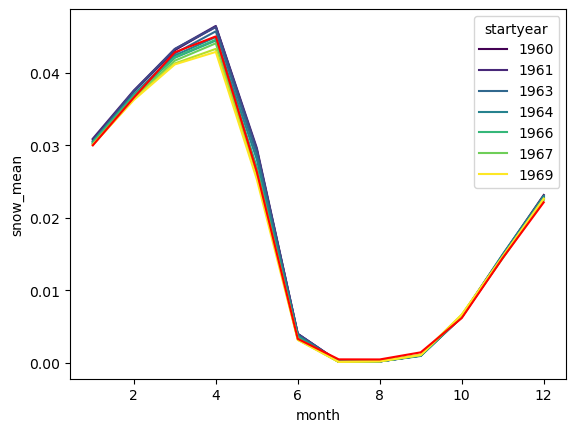

In [ ]:
snowclimatorlogies_20yrs = pd.DataFrame.from_records(climatologies)
ax = sns.lineplot(data=snowclimatorlogies_20yrs, 
             x='month', y='snow_mean', hue='startyear',
             palette='viridis')
ax.plot(range(1,13), comparison, color='r')

In [ ]:
snowclimatorlogies_20yrs_byyear = snowclimatorlogies_20yrs.pivot(
    index='month', columns='startyear', values='snow_mean').reset_index()
snowclimatorlogies_20yrs_byyear.columns = ['month'] + [
        f"start_{item}" for item in snowclimatorlogies_20yrs_byyear.columns[1:]
    ]
snowclimatorlogies_20yrs_byyear


,month,start_1960,start_1961,start_1962,start_1963,start_1964,start_1965,start_1966,start_1967,start_1968,start_1969
0,1,0.030782,0.030925,0.030605,0.030268,0.030469,0.030510,0.030333,0.030165,0.030082,0.030079
1,2,0.037435,0.037573,0.037475,0.036959,0.037023,0.036941,0.036827,0.036556,0.036436,0.036259
2,3,0.043131,0.043279,0.043299,0.042665,0.042393,0.042080,0.042138,0.041680,0.041298,0.041163
3,4,0.046385,0.046471,0.046299,0.045727,0.044934,0.044453,0.044560,0.044072,0.043301,0.042886
4,5,0.029405,0.029652,0.029384,0.028776,0.028081,0.026980,0.026736,0.026459,0.026059,0.025328
5,6,0.003986,0.004013,0.003994,0.003807,0.003718,0.003604,0.003426,0.003309,0.003196,0.003184
6,7,0.000176,0.000174,0.000174,0.000166,0.000162,0.000156,0.000138,0.000137,0.000135,0.000135
7,8,0.000210,0.000208,0.000208,0.000206,0.000205,0.000222,0.000214,0.000220,0.000215,0.000219
8,9,0.001032,0.001014,0.001011,0.000958,0.001035,0.001018,0.001047,0.001060,0.001109,0.001100
9,10,0.006514,0.006344,0.006302,0.006331,0.006466,0.006390,0.006405,0.006470,0.006661,0.006646


In [ ]:
snowclimatorlogies_20yrs_byyear['comparison_1940_1957'] = comparisonDF['sd_1940_1957']
snowclimatorlogies_20yrs_byyear

,month,start_1960,start_1961,start_1962,start_1963,start_1964,start_1965,start_1966,start_1967,start_1968,start_1969,comparison_1940_1957
0,1,0.030782,0.030925,0.030605,0.030268,0.030469,0.030510,0.030333,0.030165,0.030082,0.030079,0.030000
1,2,0.037435,0.037573,0.037475,0.036959,0.037023,0.036941,0.036827,0.036556,0.036436,0.036259,0.036584
2,3,0.043131,0.043279,0.043299,0.042665,0.042393,0.042080,0.042138,0.041680,0.041298,0.041163,0.042834
3,4,0.046385,0.046471,0.046299,0.045727,0.044934,0.044453,0.044560,0.044072,0.043301,0.042886,0.045024
4,5,0.029405,0.029652,0.029384,0.028776,0.028081,0.026980,0.026736,0.026459,0.026059,0.025328,0.026366
5,6,0.003986,0.004013,0.003994,0.003807,0.003718,0.003604,0.003426,0.003309,0.003196,0.003184,0.003318
6,7,0.000176,0.000174,0.000174,0.000166,0.000162,0.000156,0.000138,0.000137,0.000135,0.000135,0.000487
7,8,0.000210,0.000208,0.000208,0.000206,0.000205,0.000222,0.000214,0.000220,0.000215,0.000219,0.000476
8,9,0.001032,0.001014,0.001011,0.000958,0.001035,0.001018,0.001047,0.001060,0.001109,0.001100,0.001457
9,10,0.006514,0.006344,0.006302,0.006331,0.006466,0.006390,0.006405,0.006470,0.006661,0.006646,0.006185


In [ ]:
def euclidian_dist(startyr):
    return np.sqrt(((
        snowclimatorlogies_20yrs_byyear[f'start_{startyr}'] 
        - snowclimatorlogies_20yrs_byyear['comparison_1940_1957'])**2).sum())
euclidian_dist(1969)

0.0030673813233867693

In [ ]:
for startyr in range(1960, 1970):
    print(startyr, euclidian_dist(startyr))

1960 0.0038244636804508686
1961 0.0040468994596659855
1962 0.0036405774854572017
1963 0.0028413694284824455
1964 0.0022845081926509353
1965 0.0016000657661364402
1966 0.001275365646582819
1967 0.0016705928483816631
1968 0.002496093006928784
1969 0.0030673813233867693


In [ ]:
snowclimatorlogies_20yrs.to_csv("snowclimatorlogies_20yrs_tidy.csv")

In [ ]:
snowclimatorlogies_20yrs_byyear.to_csv("snowclimatorlogies_20yrs_withcomparison.csv")

### All Aprils, 1960-1988

In [ ]:
def _preprocess(ds):
    return mask_and_subset(ds)['sd']

In [ ]:
files = [str(item) for item in get_files(startyr=1960, month=4, numyrs=29)]

ds_preprocess = xr.open_mfdataset(files, preprocess=_preprocess, parallel=True)
snow_agg = ds_preprocess.sd.mean(dim=['longitude', 'latitude']).resample(time='1D').mean('time').to_dataframe()

In [ ]:
snow_agg.reset_index(inplace=True)
snow_agg['year'] = snow_agg.time.dt.year
snow_agg['day'] = snow_agg.time.dt.day
snow_agg

,index,time,sd,year,day
0,0,1960-04-01,0.040218,1960,1
1,1,1960-04-02,0.040251,1960,2
2,2,1960-04-03,0.040310,1960,3
3,3,1960-04-04,0.040444,1960,4
4,4,1960-04-05,0.040719,1960,5
...,...,...,...,...,...
10252,10252,1988-04-26,0.033950,1988,26
10253,10253,1988-04-27,0.032718,1988,27
10254,10254,1988-04-28,0.031546,1988,28
10255,10255,1988-04-29,0.030589,1988,29


In [ ]:
(snow_agg.year / 10).astype(int) * 10

0        1960
1        1960
2        1960
3        1960
4        1960
         ... 
10252    1980
10253    1980
10254    1980
10255    1980
10256    1980
Name: year, Length: 10257, dtype: int64

In [ ]:
snow_agg.drop(columns=['index'], inplace=True)
snow_agg['decade'] = (snow_agg.year / 10).astype(int) * 10
snow_agg

,time,sd,year,day,decade
0,1960-04-01,0.040218,1960,1,1960
1,1960-04-02,0.040251,1960,2,1960
2,1960-04-03,0.040310,1960,3,1960
3,1960-04-04,0.040444,1960,4,1960
4,1960-04-05,0.040719,1960,5,1960
...,...,...,...,...,...
10252,1988-04-26,0.033950,1988,26,1980
10253,1988-04-27,0.032718,1988,27,1980
10254,1988-04-28,0.031546,1988,28,1980
10255,1988-04-29,0.030589,1988,29,1980


Text(0.5, 1.0, 'April snow water equiv, 1960-1988')

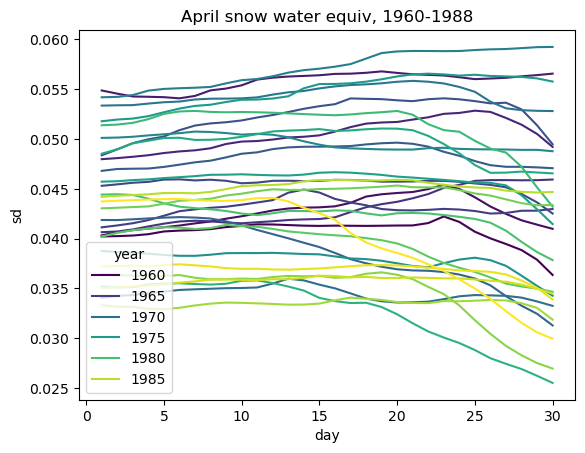

In [ ]:
sns.lineplot(data=snow_agg, x='day', y='sd', hue='year', palette='viridis')
plt.title("April snow water equiv, 1960-1988")

Text(0.5, 1.0, 'April snow water equiv, by decade')

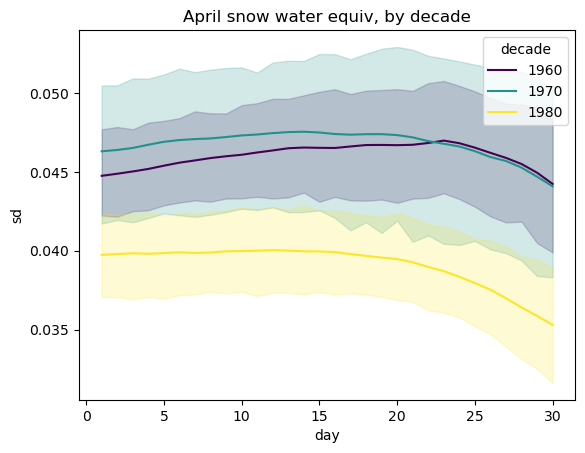

In [ ]:

sns.lineplot(data=snow_agg, x='day', y='sd', hue='decade', palette='viridis')
plt.title("April snow water equiv, by decade")

In [ ]:
snow_agg.to_csv("snow_april_climyears.csv")